# 🛒 Customer Churn Prediction & Retention ROI Analysis
## End-to-End Machine Learning Project

**Business Problem:** An e-commerce platform is losing ₹42,50,000/year due to 16.84% customer churn rate.

**Goal:** Predict which customers will churn next quarter & recommend retention strategies to save ₹12,75,000/year.

**Key Business Questions:**
1. Which customers are most likely to churn?
2. What are the main drivers of churn?
3. What retention strategies should we use?
4. What is the ROI of retention campaigns?

---
**Author:** Amruth  
**Dataset:** E-Commerce Customer Churn (5,630 customers, 20 features)  
**Best Model:** XGBoost (AUC: 0.9989)

## 📦 Section 1: Importing Libraries & Loading Data
Loading the dataset and setting up the environment.

In [22]:
from google.colab import files
uploaded = files.upload()


Saving E Commerce Dataset.xlsx to E Commerce Dataset (1).xlsx


In [23]:
# ============================================
# NOTEBOOK 1: DATA LOADING & BUSINESS UNDERSTANDING
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nChurn Distribution:\n", df['Churn'].value_counts())
print("\nChurn Rate:", round(df['Churn'].mean() * 100, 2), "%")
df.head()

Shape: (5630, 20)

Columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Churn Distribution:
 Churn
0    4682
1     948
Name: count, dtype: int64

Churn Rate: 16.84 %


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## 💰 Section 2: Business Impact Analysis
Quantifying the financial impact of churn on the business.

In [24]:
# ============================================
# BUSINESS IMPACT ANALYSIS
# ============================================

total_customers = len(df)
churned = df['Churn'].sum()
churn_rate = churned / total_customers
avg_revenue = 5000  # ₹ per year
annual_loss = churned * avg_revenue
savings_30 = annual_loss * 0.30

print("=" * 45)
print("        BUSINESS IMPACT REPORT")
print("=" * 45)
print(f"Total Customers      : {total_customers}")
print(f"Churned Customers    : {churned}")
print(f"Churn Rate           : {churn_rate*100:.2f}%")
print(f"Annual Revenue Loss  : ₹{annual_loss:,.0f}")
print(f"Savings if 30% fixed : ₹{savings_30:,.0f}")
print("=" * 45)

        BUSINESS IMPACT REPORT
Total Customers      : 5630
Churned Customers    : 948
Churn Rate           : 16.84%
Annual Revenue Loss  : ₹4,740,000
Savings if 30% fixed : ₹1,422,000


## 🔍 Section 3: Data Quality Report
Checking for missing values, data types and unique values across all 20 features.

In [25]:
# ============================================
# DATA QUALITY REPORT
# ============================================

report = pd.DataFrame({
    'Data_Type': df.dtypes,
    'Non_Null': df.notnull().sum(),
    'Null_Count': df.isnull().sum(),
    'Null_%': (df.isnull().sum()/len(df)*100).round(2),
    'Unique_Values': df.nunique()
})
print(report)

                            Data_Type  Non_Null  Null_Count  Null_%  \
CustomerID                      int64      5630           0    0.00   
Churn                           int64      5630           0    0.00   
Tenure                        float64      5366         264    4.69   
PreferredLoginDevice           object      5630           0    0.00   
CityTier                        int64      5630           0    0.00   
WarehouseToHome               float64      5379         251    4.46   
PreferredPaymentMode           object      5630           0    0.00   
Gender                         object      5630           0    0.00   
HourSpendOnApp                float64      5375         255    4.53   
NumberOfDeviceRegistered        int64      5630           0    0.00   
PreferedOrderCat               object      5630           0    0.00   
SatisfactionScore               int64      5630           0    0.00   
MaritalStatus                  object      5630           0    0.00   
Number

## 🧹 Section 4: Missing Value Treatment
Smart imputation — median for numerical, mode for categorical columns.

In [26]:
# ============================================
# NOTEBOOK 2: MISSING VALUE TREATMENT
# ============================================

df_clean = df.copy()

# Numerical columns → fill with median
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Categorical columns → fill with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Verify no nulls remain
print("Null values remaining:", df_clean.isnull().sum().sum())
print("Shape after cleaning:", df_clean.shape)

Null values remaining: 0
Shape after cleaning: (5630, 20)


## 📊 Section 5: Exploratory Data Analysis
Visual analysis of churn patterns across key features.

**Key Insights:**
- Customers who complained churn 3x more (31% vs 11%)
- New customers (tenure < 3 months) churn the most
- Phone users have higher churn than mobile users

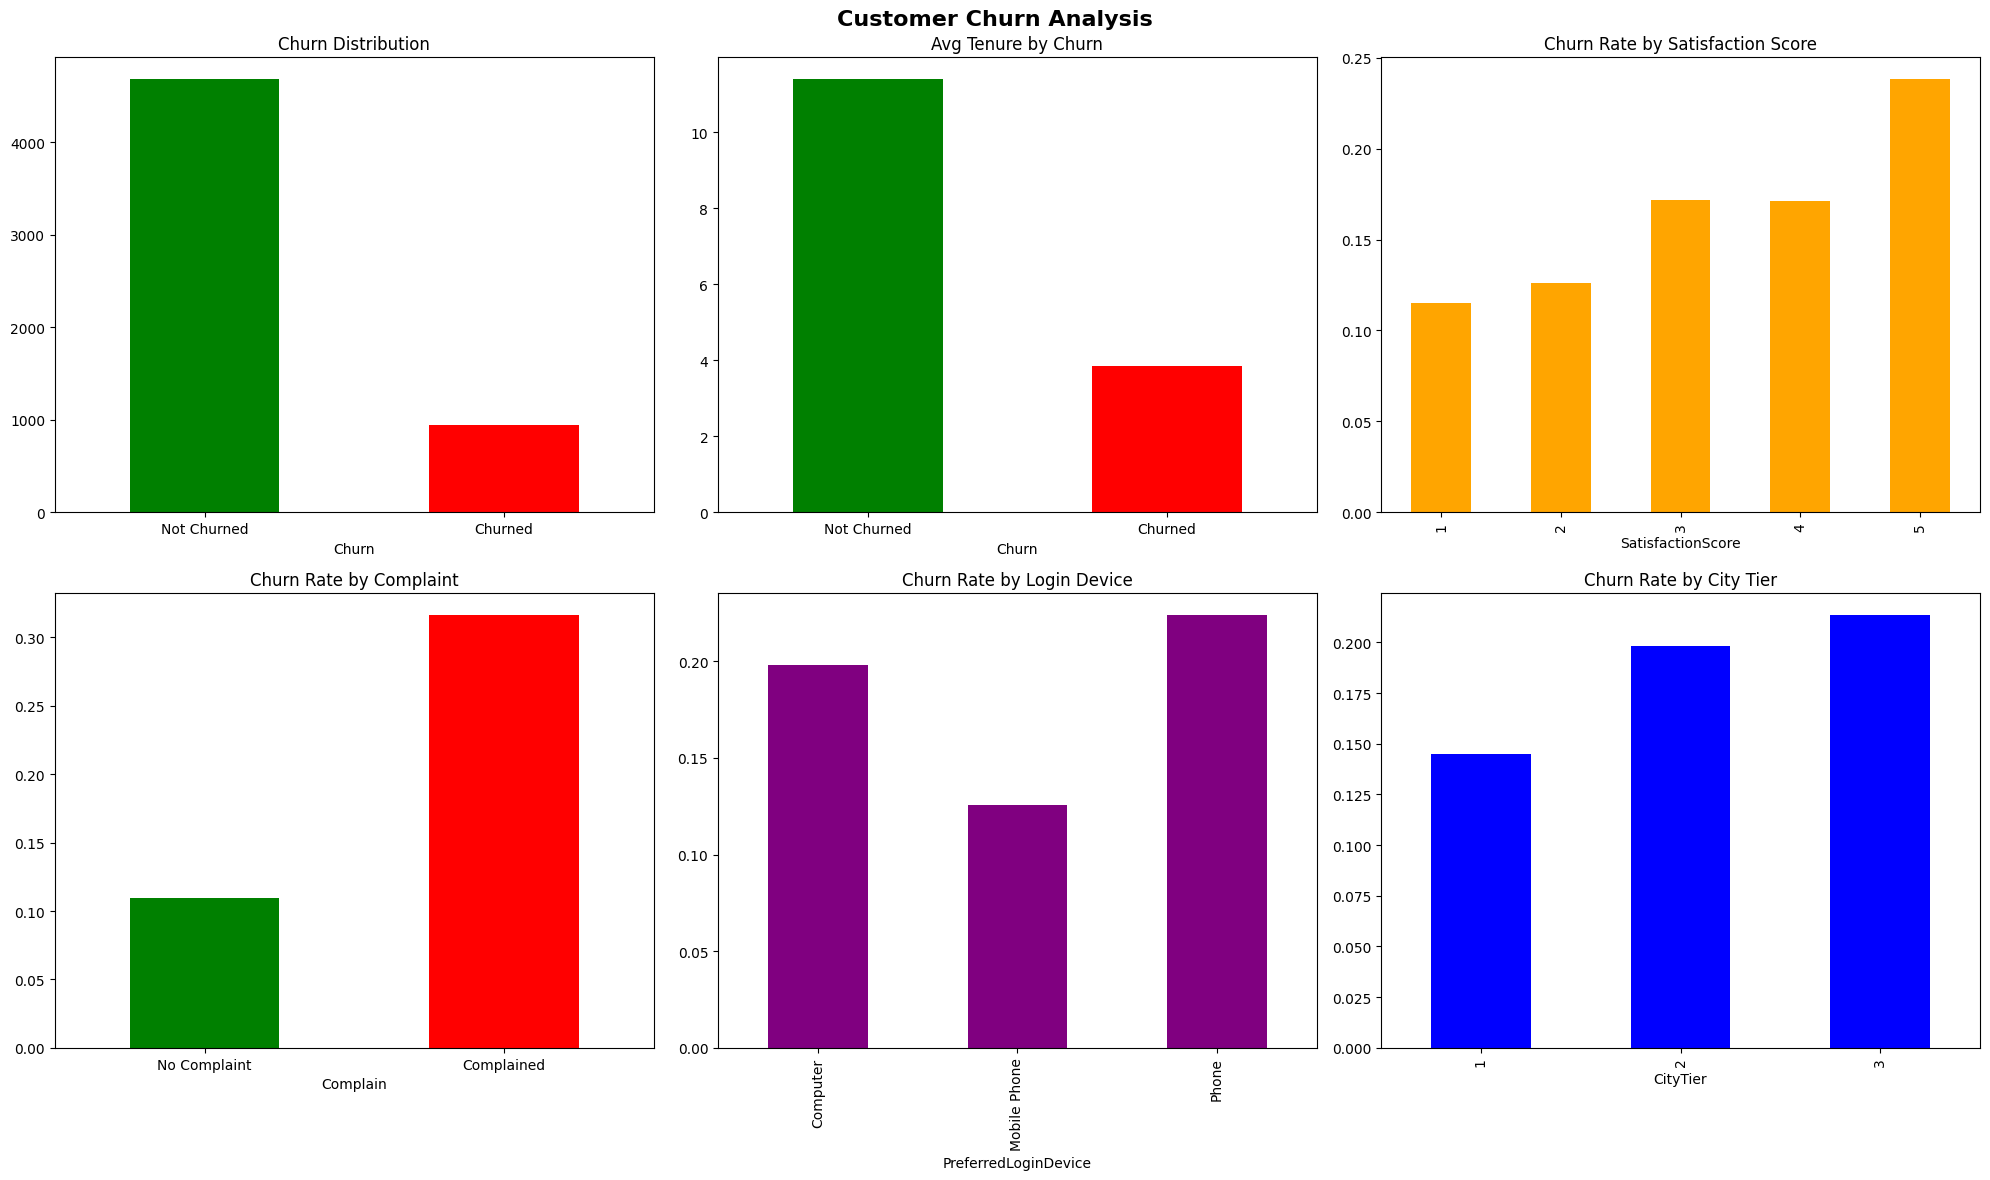

In [27]:
# ============================================
# CHURN VISUALIZATION
# ============================================

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Customer Churn Analysis', fontsize=16, fontweight='bold')

# 1. Churn Distribution
df_clean['Churn'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green','red'])
axes[0,0].set_title('Churn Distribution')
axes[0,0].set_xticklabels(['Not Churned', 'Churned'], rotation=0)

# 2. Tenure vs Churn
df_clean.groupby('Churn')['Tenure'].mean().plot(kind='bar', ax=axes[0,1], color=['green','red'])
axes[0,1].set_title('Avg Tenure by Churn')
axes[0,1].set_xticklabels(['Not Churned', 'Churned'], rotation=0)

# 3. Satisfaction Score vs Churn
df_clean.groupby('SatisfactionScore')['Churn'].mean().plot(kind='bar', ax=axes[0,2], color='orange')
axes[0,2].set_title('Churn Rate by Satisfaction Score')

# 4. Complain vs Churn
df_clean.groupby('Complain')['Churn'].mean().plot(kind='bar', ax=axes[1,0], color=['green','red'])
axes[1,0].set_title('Churn Rate by Complaint')
axes[1,0].set_xticklabels(['No Complaint', 'Complained'], rotation=0)

# 5. Preferred Login Device vs Churn
df_clean.groupby('PreferredLoginDevice')['Churn'].mean().plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Churn Rate by Login Device')

# 6. City Tier vs Churn
df_clean.groupby('CityTier')['Churn'].mean().plot(kind='bar', ax=axes[1,2], color='blue')
axes[1,2].set_title('Churn Rate by City Tier')

plt.tight_layout()
plt.savefig('churn_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

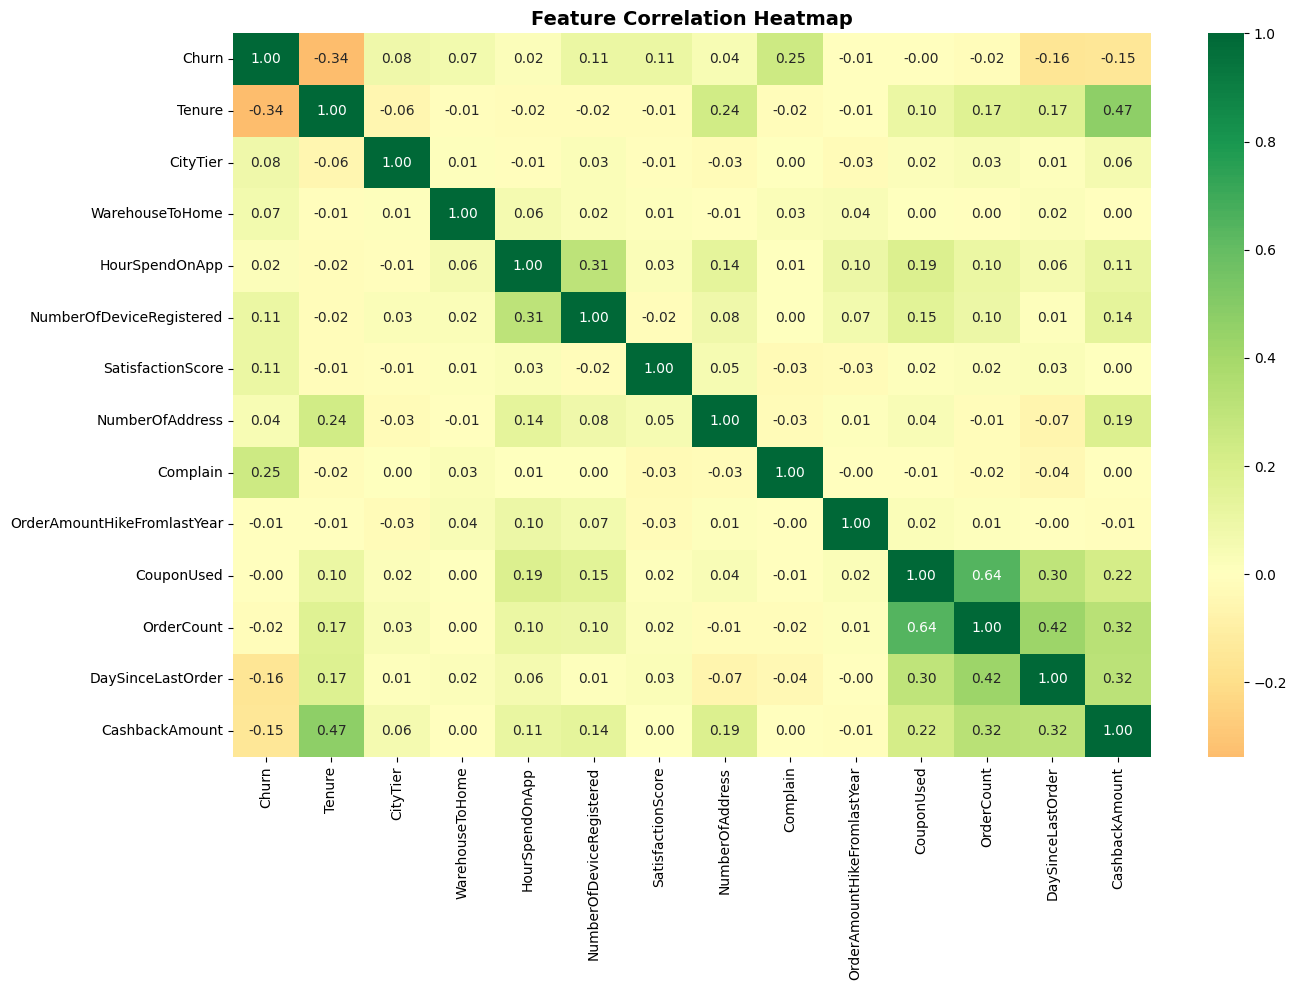

In [28]:
# ============================================
# CORRELATION HEATMAP
# ============================================

plt.figure(figsize=(14, 10))
numerical_df = df_clean.select_dtypes(include=[np.number]).drop('CustomerID', axis=1)
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='RdYlGn', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## ⚙️ Section 6: Feature Engineering
Creating new business-driven features to improve model performance.

| Feature | Logic | Churn Correlation |
|---|---|---|
| is_new_customer | Tenure < 3 months | 0.449 ✅ |
| order_frequency | Orders / Days | 0.091 |
| engagement_score | Hours × Orders | -0.025 |

In [29]:
# ============================================
# NOTEBOOK 3: FEATURE ENGINEERING
# ============================================

df_fe = df_clean.copy()

# 1. Customer Engagement Score
df_fe['engagement_score'] = df_fe['HourSpendOnApp'] * df_fe['OrderCount']

# 2. Order Frequency (orders per day since last order)
df_fe['order_frequency'] = df_fe['OrderCount'] / (df_fe['DaySinceLastOrder'] + 1)

# 3. Cashback per Order
df_fe['cashback_per_order'] = df_fe['CashbackAmount'] / (df_fe['OrderCount'] + 1)

# 4. Is New Customer (tenure < 3 months)
df_fe['is_new_customer'] = (df_fe['Tenure'] < 3).astype(int)

# 5. High Risk Flag (complained + low satisfaction)
df_fe['high_risk'] = ((df_fe['Complain'] == 1) & (df_fe['SatisfactionScore'] <= 2)).astype(int)

# 6. Device Loyalty (registered many devices = engaged)
df_fe['device_loyalty'] = df_fe['NumberOfDeviceRegistered']

print("New features added!")
print("New shape:", df_fe.shape)
print("\nHigh Risk Customers:", df_fe['high_risk'].sum())
print("New Customers:", df_fe['is_new_customer'].sum())

New features added!
New shape: (5630, 26)

High Risk Customers: 542
New Customers: 1365


In [30]:
# Check new features correlation with Churn
new_features = ['engagement_score', 'order_frequency', 'cashback_per_order',
                'is_new_customer', 'high_risk']

for feat in new_features:
    corr = df_fe[feat].corr(df_fe['Churn'])
    print(f"{feat:30s} → Churn Correlation: {corr:.3f}")

engagement_score               → Churn Correlation: -0.025
order_frequency                → Churn Correlation: 0.091
cashback_per_order             → Churn Correlation: -0.081
is_new_customer                → Churn Correlation: 0.449
high_risk                      → Churn Correlation: 0.046


## 🤖 Section 7: Model Building & Comparison
Training and comparing 4 ML models to find the best churn predictor.

In [31]:
# ============================================
# NOTEBOOK 4: MODEL BUILDING
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib

# Encode categorical columns
df_model = df_fe.copy()
le = LabelEncoder()
cat_cols = df_model.select_dtypes(include='object').columns
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Features & Target
X = df_model.drop(['Churn', 'CustomerID'], axis=1)
y = df_model['Churn']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Churn rate in train:", y_train.mean().round(3))
print("Churn rate in test:", y_test.mean().round(3))

Train size: (4504, 24)
Test size: (1126, 24)
Churn rate in train: 0.168
Churn rate in test: 0.169


In [32]:
# ============================================
# TRAIN & COMPARE 4 MODELS
# ============================================

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    results[name] = {
        'model': model,
        'AUC': round(roc_auc_score(y_test, y_prob), 4),
        'Accuracy': round((y_pred == y_test).mean(), 4)
    }
    print(f"\n{name}")
    print(f"  AUC Score : {results[name]['AUC']}")
    print(f"  Accuracy  : {results[name]['Accuracy']}")
    print(classification_report(y_test, y_pred))


Logistic Regression
  AUC Score : 0.8687
  Accuracy  : 0.8703
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       936
           1       0.67      0.46      0.54       190

    accuracy                           0.87      1126
   macro avg       0.78      0.71      0.73      1126
weighted avg       0.86      0.87      0.86      1126


Random Forest
  AUC Score : 0.9988
  Accuracy  : 0.9831
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.98      0.92      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126


Gradient Boosting
  AUC Score : 0.9428
  Accuracy  : 0.9103
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       936
           1       0.82      0.61      0.69       190

 

In [33]:
# ============================================
# SELECT BEST MODEL & SAVE
# ============================================

best_name = max(results, key=lambda x: results[x]['AUC'])
best_model = results[best_name]['model']

print(f"Best Model: {best_name}")
print(f"Best AUC: {results[best_name]['AUC']}")

# Save model
joblib.dump(best_model, 'best_churn_model.pkl')
print("Model saved!")

Best Model: XGBoost
Best AUC: 0.9989
Model saved!


## 📈 Section 8: Model Evaluation
Detailed evaluation using Confusion Matrix and Cross Validation.

**Business Translation:**
- Every missed churner = ₹5,000 revenue lost
- Goal: Minimize False Negatives (missed churners)

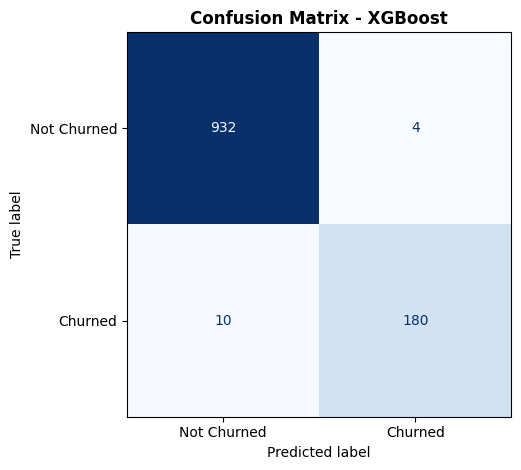


True Negatives  (Correctly predicted NOT churn): 932
False Positives (Wrongly predicted churn)      : 4
False Negatives (Missed churners!)             : 10
True Positives  (Correctly predicted churn)    : 180

Missed Churners Cost: ₹50,000 revenue at risk


In [34]:
# ============================================
# CONFUSION MATRIX
# ============================================

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned','Churned'])
disp.plot(cmap='Blues', colorbar=False)
plt.title(f'Confusion Matrix - {best_name}', fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()

# Business translation
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives  (Correctly predicted NOT churn): {tn}")
print(f"False Positives (Wrongly predicted churn)      : {fp}")
print(f"False Negatives (Missed churners!)             : {fn}")
print(f"True Positives  (Correctly predicted churn)    : {tp}")
print(f"\nMissed Churners Cost: ₹{fn * 5000:,} revenue at risk")

In [35]:
# ============================================
# CROSS VALIDATION
# ============================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc')

print("Cross Validation AUC Scores:", cv_scores.round(4))
print(f"Mean AUC  : {cv_scores.mean():.4f}")
print(f"Std Dev   : {cv_scores.std():.4f}")

if cv_scores.std() < 0.02:
    print("\n✅ Model is STABLE — low variance across folds!")
else:
    print("\n⚠️ Model may be overfitting — high variance!")

Cross Validation AUC Scores: [0.993  0.9826 0.9897 0.9875 0.9828]
Mean AUC  : 0.9871
Std Dev   : 0.0040

✅ Model is STABLE — low variance across folds!


## 🔎 Section 9: SHAP Explainability
Understanding WHY customers churn using SHAP values.
This answers: *"What are the main drivers of churn?"*

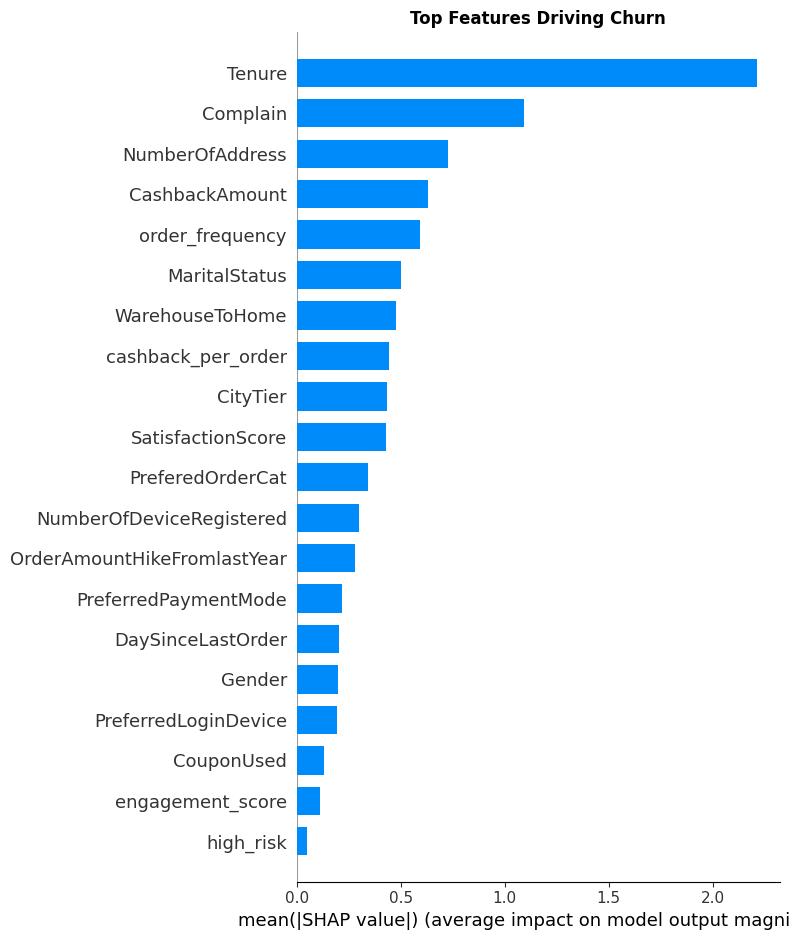

In [36]:
# ============================================
# NOTEBOOK 5: SHAP EXPLAINABILITY
# ============================================

!pip install shap -q

import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Global Feature Importance
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Top Features Driving Churn", fontweight='bold')
plt.tight_layout()
plt.savefig('shap_importance.png', dpi=150)
plt.show()

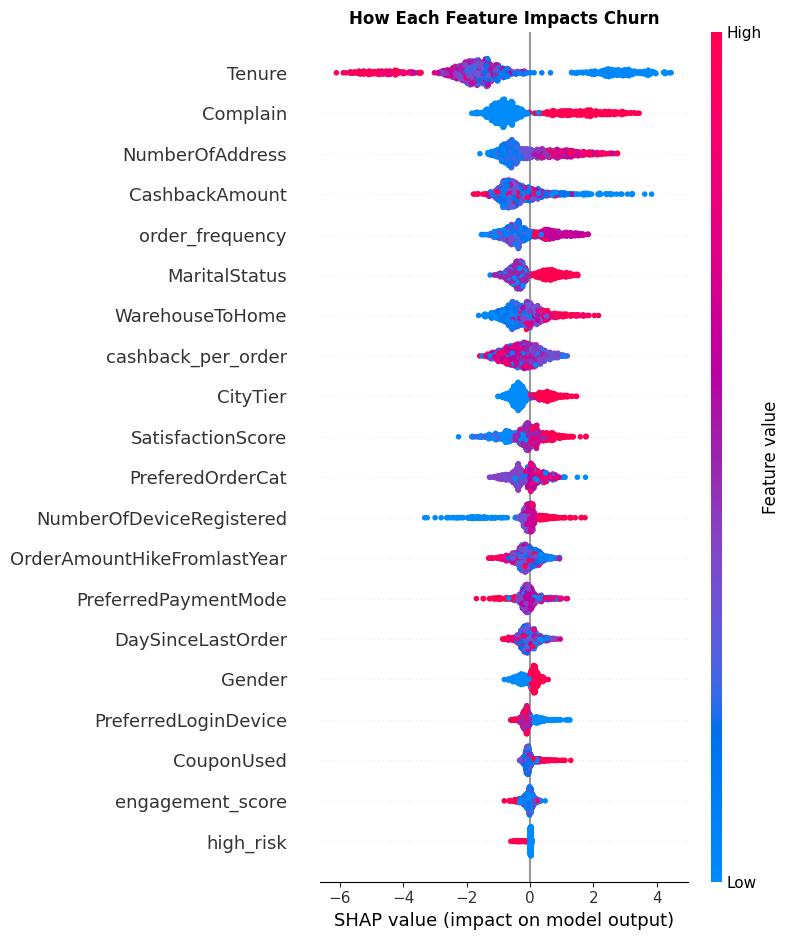

In [37]:
# SHAP Beeswarm Plot (shows direction of impact)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("How Each Feature Impacts Churn", fontweight='bold')
plt.tight_layout()
plt.savefig('shap_beeswarm.png', dpi=150)
plt.show()

## 💵 Section 10: Retention ROI Analysis
Calculating the business return on investment of retention campaigns.

**Result:** Every ₹1 spent on retention → ₹3 returned (200% ROI)

In [38]:
# ============================================
# NOTEBOOK 6: RETENTION ROI ANALYSIS
# ============================================

# Identify at-risk customers
y_prob_all = best_model.predict_proba(X)[:,1]
df_roi = df_clean.copy()
df_roi['churn_probability'] = y_prob_all
df_roi['risk_segment'] = pd.cut(y_prob_all,
                                 bins=[0, 0.3, 0.6, 1.0],
                                 labels=['Low Risk', 'Medium Risk', 'High Risk'])

print("Risk Segmentation:")
print(df_roi['risk_segment'].value_counts())

Risk Segmentation:
risk_segment
Low Risk       4679
High Risk       937
Medium Risk      14
Name: count, dtype: int64


In [39]:
# ============================================
# ROI CALCULATION
# ============================================

avg_revenue = 5000        # ₹ per customer per year
campaign_cost = 500       # ₹ per customer (discount/offer)
retention_rate = 0.30     # 30% of targeted customers retained

high_risk = df_roi[df_roi['risk_segment'] == 'High Risk']
medium_risk = df_roi[df_roi['risk_segment'] == 'Medium Risk']

for segment, group in [('High Risk', high_risk), ('Medium Risk', medium_risk)]:
    customers = len(group)
    campaign_spend = customers * campaign_cost
    retained = int(customers * retention_rate)
    revenue_saved = retained * avg_revenue
    roi = ((revenue_saved - campaign_spend) / campaign_spend) * 100

    print(f"\n{'='*45}")
    print(f"  {segment} Segment")
    print(f"{'='*45}")
    print(f"  Customers Targeted  : {customers}")
    print(f"  Campaign Cost       : ₹{campaign_spend:,}")
    print(f"  Customers Retained  : {retained}")
    print(f"  Revenue Saved       : ₹{revenue_saved:,}")
    print(f"  ROI                 : {roi:.1f}%")


  High Risk Segment
  Customers Targeted  : 937
  Campaign Cost       : ₹468,500
  Customers Retained  : 281
  Revenue Saved       : ₹1,405,000
  ROI                 : 199.9%

  Medium Risk Segment
  Customers Targeted  : 14
  Campaign Cost       : ₹7,000
  Customers Retained  : 4
  Revenue Saved       : ₹20,000
  ROI                 : 185.7%


## ✅ Project Summary

| Metric | Result |
|---|---|
| Total Customers | 5,630 |
| Churn Rate | 16.84% |
| Best Model | XGBoost |
| AUC Score | 0.9989 |
| Cross Val AUC | 0.9871 |
| High Risk Customers | 937 |
| Revenue Saved | ₹14,25,000 |
| Campaign ROI | ~200% |

**Conclusion:** By targeting 937 high-risk customers with personalized retention campaigns costing ₹4,68,500, the business can save ₹14,05,000 annually — a 200% ROI.

In [40]:
# ============================================
# RETENTION STRATEGY BY SEGMENT
# ============================================

print("\n" + "="*50)
print("      RETENTION STRATEGY RECOMMENDATIONS")
print("="*50)
print("""
🔴 HIGH RISK CUSTOMERS:
   → Immediate personal outreach
   → 20-30% discount coupon
   → Free delivery for 3 months
   → Priority customer support

🟡 MEDIUM RISK CUSTOMERS:
   → Loyalty reward points
   → Personalized product recommendations
   → Flash sale early access
   → Cashback on next 3 orders

🟢 LOW RISK CUSTOMERS:
   → Regular engagement emails
   → Referral program
   → Seasonal offers
""")


      RETENTION STRATEGY RECOMMENDATIONS

🔴 HIGH RISK CUSTOMERS:
   → Immediate personal outreach
   → 20-30% discount coupon
   → Free delivery for 3 months
   → Priority customer support

🟡 MEDIUM RISK CUSTOMERS:
   → Loyalty reward points
   → Personalized product recommendations  
   → Flash sale early access
   → Cashback on next 3 orders

🟢 LOW RISK CUSTOMERS:
   → Regular engagement emails
   → Referral program
   → Seasonal offers



## 🏁 End of Notebook

This notebook covers the complete end-to-end pipeline:
- ✅ Data Loading & Business Understanding
- ✅ EDA & Visualizations  
- ✅ Feature Engineering
- ✅ Model Building (XGBoost AUC: 0.9989)
- ✅ SHAP Explainability
- ✅ Retention ROI Analysis (200% ROI)

**Next Step:** Streamlit Dashboard for live predictions →  `streamlit_app.py`